<a href="https://colab.research.google.com/github/anvika6677/Energy-Dataset-Analysis-and-Preprocessing/blob/main/Energy_Dataset_Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings


In [ ]:
df = pd.read_csv('/content/sample_data/energy_dataset.csv')

In [ ]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [ ]:
df.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96,NaN,3253,30619,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51,NaN,3353,29932,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36,NaN,3404,27903,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29,NaN,3273,25450,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26,NaN,3117,24424,24455.0,64.27,69.88


In [ ]:
df.shape

(35064, 29)

In [ ]:
column_names=df.columns
print(column_names)

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')


In [ ]:
df_cleaned = df.drop_duplicates()
print(df_cleaned)

                            time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...  

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [ ]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [ ]:
total_rows = df.shape[0]
null_percentage = (null_counts / total_rows) * 100
print(null_percentage)

time                                             0.000000
generation biomass                               0.054187
generation fossil brown coal/lignite             0.051335
generation fossil coal-derived gas               0.051335
generation fossil gas                            0.051335
generation fossil hard coal                      0.051335
generation fossil oil                            0.054187
generation fossil oil shale                      0.051335
generation fossil peat                           0.051335
generation geothermal                            0.051335
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.054187
generation hydro run-of-river and poundage       0.054187
generation hydro water reservoir                 0.051335
generation marine                                0.054187
generation nuclear                               0.048483
generation other                                 0.051335
generation oth

In [ ]:
max_null_percentage = 40
df_dropped = df.loc[:, null_percentage <= max_null_percentage]
print(df_dropped)


                            time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...  

In [ ]:
unique_counts = df.nunique()
print(unique_counts)

time                                           35064
generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil coal-derived gas                 1
generation fossil gas                           8297
generation fossil hard coal                     7266
generation fossil oil                            321
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage aggregated         0
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation marine                                  1
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                              

In [ ]:
def categorize_attributes(df):
    discrete = []
    continuous = []
    categorical = []
    numerical = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Check if the column contains integers only (discrete) or floats (continuous)
            if df[column].apply(lambda x: isinstance(x, int)).all():
                discrete.append(column)
            else:
                continuous.append(column)
            numerical.append(column)
        else:
            categorical.append(column)

    return {
        'Discrete Attributes': discrete,
        'Continuous Attributes': continuous,
        'Categorical Attributes': categorical,
        'Numerical Attributes': numerical
    }

# Categorize the attributes
attribute_categories = categorize_attributes(df)


In [ ]:
import scipy
from scipy.stats import skew

def calculate_skewness(df):
    numerical_columns = df.select_dtypes(include=['number']).columns
    skewness_values = {}

    for column in numerical_columns:
        skewness_values[column] = skew(df[column])

    return skewness_values

# Calculate skewness for each numerical attribute
skewness_dict = calculate_skewness(df)

# Print the skewness values
for column, skew_value in skewness_dict.items():
    print(f"Skewness of {column}: {skew_value}")

Skewness of generation biomass: nan
Skewness of generation fossil brown coal/lignite: nan
Skewness of generation fossil coal-derived gas: nan
Skewness of generation fossil gas: nan
Skewness of generation fossil hard coal: nan
Skewness of generation fossil oil: nan
Skewness of generation fossil oil shale: nan
Skewness of generation fossil peat: nan
Skewness of generation geothermal: nan
Skewness of generation hydro pumped storage aggregated: nan
Skewness of generation hydro pumped storage consumption: nan
Skewness of generation hydro run-of-river and poundage: nan
Skewness of generation hydro water reservoir: nan
Skewness of generation marine: nan
Skewness of generation nuclear: nan
Skewness of generation other: nan
Skewness of generation other renewable: nan
Skewness of generation solar: nan
Skewness of generation waste: nan
Skewness of generation wind offshore: nan
Skewness of generation wind onshore: nan
Skewness of forecast solar day ahead: 0.9899754069463866
Skewness of forecast wi

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                                             generation biomass  \
generation biomass                                     1.000000   
generation fossil brown coal/lignite                   0.229809   
generation fossil coal-derived gas                          NaN   
generation fossil gas                                 -0.021660   
generation fossil hard coal                            0.433522   
generation fossil oil                                  0.459530   
generation fossil oil shale                                 NaN   
generation fossil peat                                      NaN   
generation geothermal                                       NaN   
generation hydro pumped storage aggregated                  NaN   
generation hydro pumped storage consumption           -0.044898   
generation hydro run-of-river and poundage            -0.284877   
generation hydro water reservoir                      -0.033675   
generation marine                                           Na

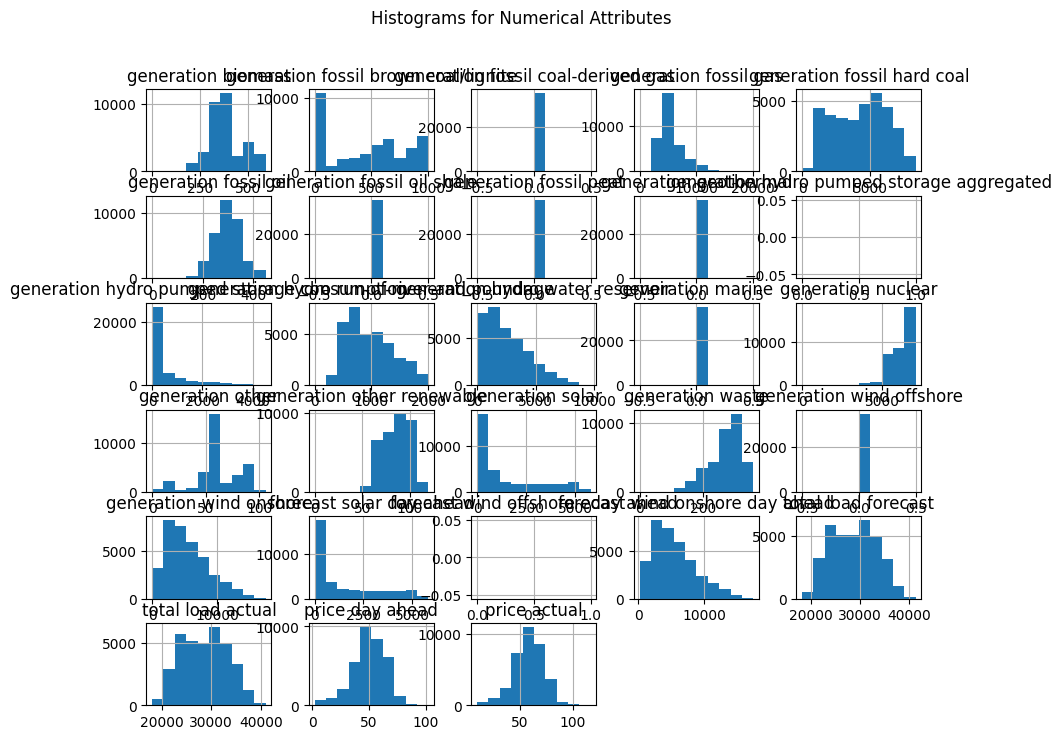

In [ ]:
df.hist(figsize=(10, 8), bins=10)
plt.suptitle('Histograms for Numerical Attributes')
plt.show()


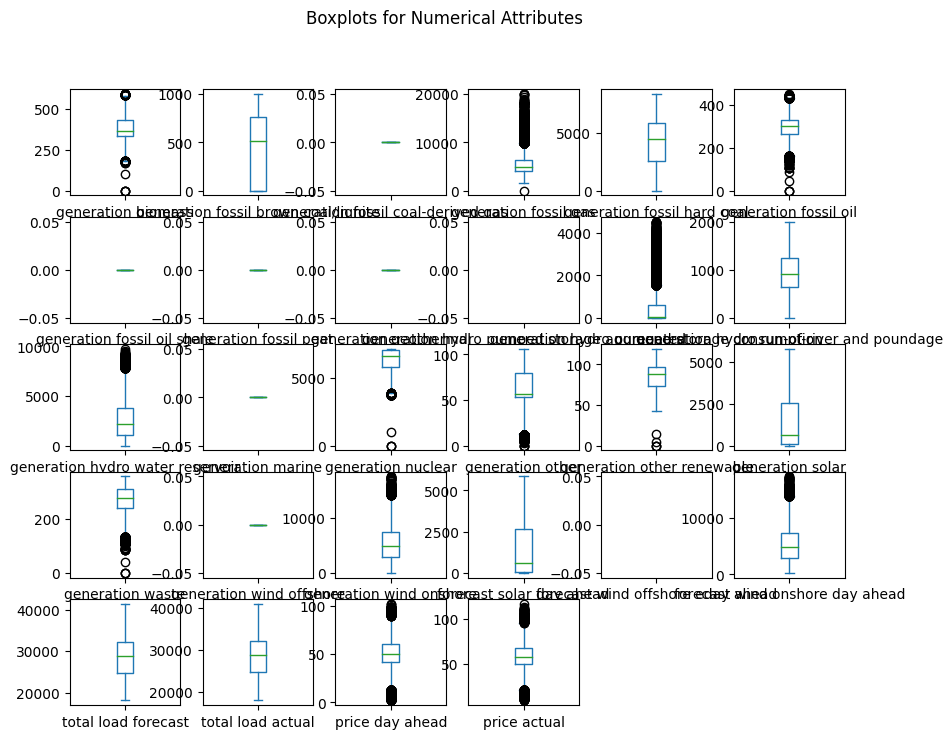

In [ ]:

# Calculate the number of numerical columns
num_numerical_cols = len(df.select_dtypes(include=['number']).columns)

# Calculate the required layout (adjust as needed)
num_rows = int(num_numerical_cols**0.5)
num_cols = int(num_numerical_cols / num_rows) + (num_numerical_cols % num_rows > 0)


df.plot(kind='box', subplots=True, layout=(num_rows, num_cols), figsize=(10, 8), title='Boxplots for Numerical Attributes')
plt.show()

In [ ]:
# Check for columns with zero variance
zero_variance_cols = df.columns[df.std() == 0]

# Remove columns with zero variance
df = df.drop(columns=zero_variance_cols)

# Recalculate the number of numerical columns after removing zero variance columns
num_numerical_cols = len(df.select_dtypes(include=['number']).columns)

# Calculate the required layout (adjust as needed)
num_rows = int(num_numerical_cols**0.5)
num_cols = int(num_numerical_cols / num_rows) + (num_numerical_cols % num_rows > 0)

# Create density plots for the remaining numerical columns
df.plot(kind='density', subplots=True, layout=(num_rows, num_cols), figsize=(10, 8), title='Density Plots for Numerical Attributes')
plt.show()

TypeError: could not convert string to float: '2015-01-01 00:00:00+01:00'